In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Drop rainfall column
df = df.drop(columns=["rainfall"])

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Base Learner and Meta Learner  ( EXECUTION EXPLAINATION )

## Base learner -
    SVM, LR, KNN, CART (Decision Tree) these algorithm out a number of probabilities (depending on how many crops are there). For Example - if there are 10 crops the output would be [0.2,0.1,0.5,.....,0.2].

    Then Four base Models will create 10 X 4 = 40 matrix dataset for the Meta Leaner.
  
## Meta Learner -
    Trained on the Matrix dataset produced by the base learner Models it will give the Final Prediction on the Crop Classification.

In [4]:
base_learners = [
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(max_iter=500)),
    ('knn', KNeighborsClassifier()),
    ('cart', DecisionTreeClassifier())
]

# -----------------------------
# Meta learner (Level-1 model)
# -----------------------------
meta_learner = RandomForestClassifier(random_state=42)

# -----------------------------
# Stacking Classifier
# -----------------------------
stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=False,
    n_jobs=-1
)

# Train model
stack_clf.fit(X_train, y_train)

# Predictions
y_pred = stack_clf.predict(X_test)


✅ Test Accuracy: 97.05%

Confusion Matrix:
 [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  1 

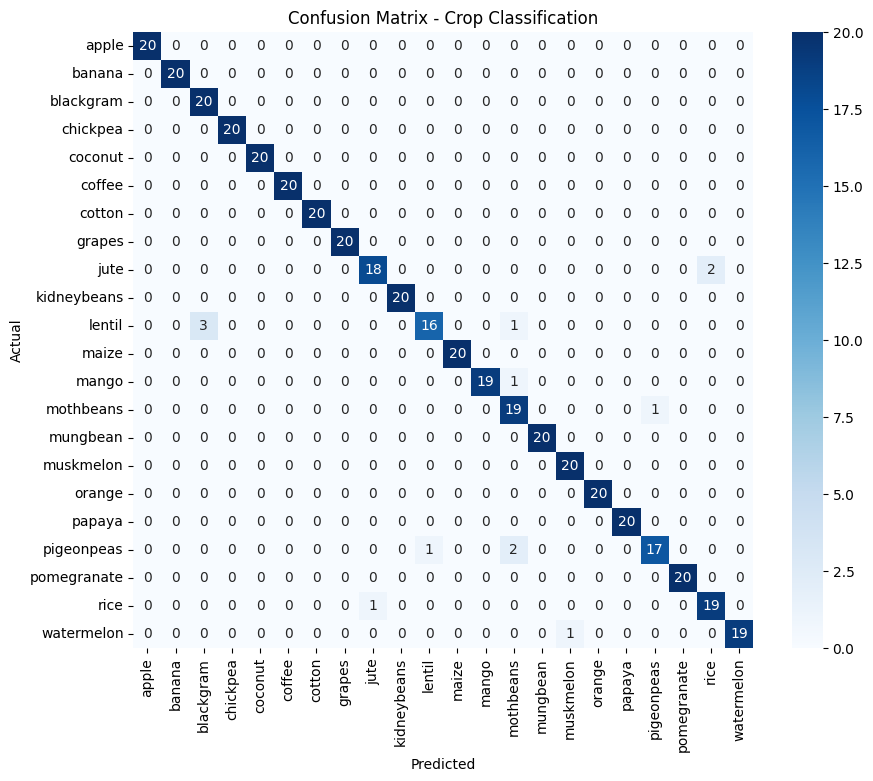


Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.87      1.00      0.93        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.90      0.92        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.80      0.86        20
       maize       1.00      1.00      1.00        20
       mango       1.00      0.95      0.97        20
   mothbeans       0.83      0.95      0.88        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       0.95      1.00      0.98        20
      orange       1.00      1.00      1.00        20
  

In [5]:
acc = accuracy_score(y_test, y_pred) * 100
print(f"✅ Test Accuracy: {acc:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Crop Classification")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
